# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions
## Name: Yun Kyaw, 251102171

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps Before Submitting

You may need to install packages as follows:

`python -m pip install matplotlib numpy scipy pandas scikit-learn`

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [123]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and its tail length by plotting a scatter plot of the `age` and `tailL` columns. Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. 

In [124]:
# Read in the data with pandas
possum_data = pd.read_csv("possum.csv")

Text(0, 0.5, 'Tail Length')

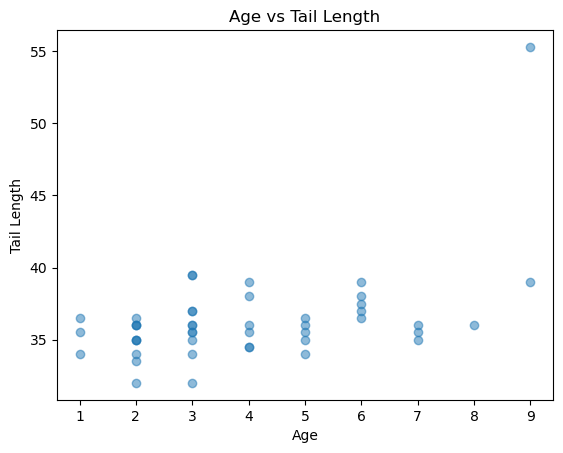

In [125]:
# Make the scatter plot (don't forget the axis labels)
plt.scatter(x = possum_data['age'], y = possum_data['tailL'], alpha = 0.5)
plt.title("Age vs Tail Length")
plt.xlabel("Age")
plt.ylabel("Tail Length")

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call your function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [126]:
def linearModelPredict(b,X):
    y_pred = X@b
    return y_pred

In [127]:
# testing linearModelPredict
X = np.array([[1,0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])

y_pred = linearModelPredict(b, X)
print(y_pred)

[ 0.1 -0.2  0.7]


In [128]:
# testing when b is a 2d-array
X = np.array([[1,0], [1, -1], [1, 2]])
b1 = np.array([[0.1, 0.3]]).T

y_pred1 = linearModelPredict(b1, X)
print(y_pred1)

[[ 0.1]
 [-0.2]
 [ 0.7]]


**Answer:** Here, we predict $\hat{y}$ when $X$ = 0 to be 0.1, when $X$ = -1 to be -0.2, and when when $X$ = 2 to be 0.7. Additionally, we find that if $\beta$ is a 2d-array, the resulting $\hat{y}$ will produce the same numerical variables, though the result is also a 2d-array.

### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [129]:
def linearModelLossRSS(b,X,y):
    # model predictions
    y_pred = linearModelPredict(b,X)
    
    # getting the residuals
    res = y - y_pred
    
    # getting the residuals sums of squares
    residual_sum_of_squares = (np.sum(np.square(res)))
    
    # solving gradient
    gradient = -2 * X.T@(res)
    
    return (residual_sum_of_squares, gradient)

In [130]:
# testing the function
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

linModLRSSans = linearModelLossRSS(b,X,y)
print(linModLRSSans)

(2.06, array([-3.6, -4. ]))


**Answer:** Thus, we find that we need to decrease the value of the parameter as the residual sum of squares is positive. Additionally, we find our loss is 2.06, and the gradient is [-3.6, -4]

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```


In [131]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    # setting starting values
    bstart = [0,0]

    # calling optimizer
    opt_result = so.minimize(lossfcn, bstart, args = (X, y), jac = True)
    
    estimated_betas = opt_result.x
    
    # calculating R2
    y_pred = linearModelPredict(estimated_betas, X)
    
    y_bar = sum(y)/len(y)

    RSS = (np.sum(np.square(y - y_pred)))

    TSS = (np.sum(np.square(y - y_bar)))
    
    R2 = 1 - (RSS/TSS)

    return (estimated_betas,R2)

In [132]:
# testing linearModelFit
test_fit = linearModelFit(X,y)
print(test_fit)

(array([0.6, 0.6]), 0.75)


**Answer:** Thus, the best parameters for both $\hat{\beta}_0$, and $\hat{\beta}_1$ are 0.6, and the fitted R2 is 0.75, which suggests that the model is relatively good at predicting y values for the dataset.

### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally spaced ages (using for example np.linspace). Also report the R2 value for the fit. You can do this by either printing out the R2 of the fit or putting it on your plot via the `annotate` function in matplotlib.

In [133]:
# Making the y and x partitions
possum_y = possum_data["tailL"]

design_x = np.repeat(1, len(possum_data))
possum_X = np.column_stack((design_x, possum_data["age"]))

In [134]:
# Calling the fitting function, and reporting the R2
possum_beta = linearModelFit(possum_X, possum_y)
print("The R2 is:", possum_beta[1])

# Making predictions for Y
spaced_x = np.linspace(1.0, 9.0, num = 9)
possum_X_pred = np.column_stack((np.repeat(1, len(spaced_x)), spaced_x))
possum_pred = linearModelPredict(possum_beta[0], possum_X_pred)

The R2 is: 0.22286587947604142


In [135]:
# Creating a new matrix for the predicted points
possum_pred_line = pd.DataFrame({'X':spaced_x, 'Y': possum_pred})

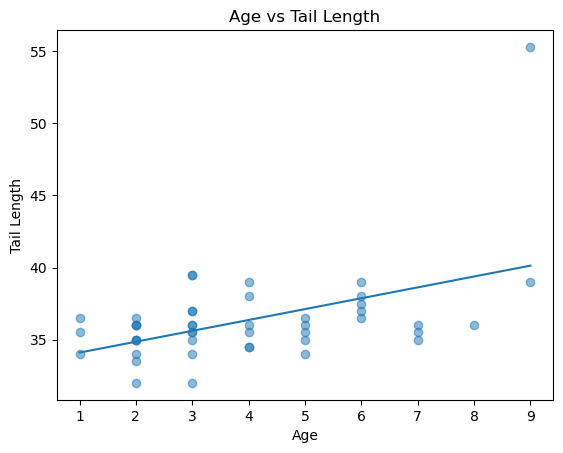

In [136]:
# Create the scatter plot (see question 1.1)
plt.scatter(x = possum_data['age'], y = possum_data['tailL'], alpha = 0.5)
plt.title("Age vs Tail Length")
plt.xlabel("Age")
plt.ylabel("Tail Length")

# Add the line to the graph
plt.plot(possum_pred_line['X'], possum_pred_line['Y'], label = "Predictions")

**Answer:** The R2 value is roughly 0.223

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [137]:
def linearModelLossLAD(b,X,y):
    # Calculating the predicted values
    y_pred = X@b

    # getting the residuals
    res = y - y_pred

    # getting the loss
    sum_abs_dev = np.sum(np.abs(res))

    # getting the gradient
    b0_grad = -np.sum(np.sign(res))
    b1_grad = -np.sum(np.sign(res)@X)

    grad = [b0_grad, b1_grad]

    return (sum_abs_dev,grad)

In [138]:
# testing the function
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

test2 = linearModelLossLAD(b,X,y)
print(test2)

(2.0, [-1.0, -2.0])


**Answer:** Here, the loss, as calculated by the sum of absolute deviations, is 2, and the gradient for $\beta_0$ and $\beta_1$ is [-1, -2], respectively

### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the R2-value. 

In [139]:
# Making the y and x partitions
possum_y = possum_data["tailL"]

design_x = np.repeat(1, len(possum_data))
possum_X = np.column_stack((design_x, possum_data["age"]))

# Fitting the LAD model
possum_beta_lad = linearModelFit(possum_X, possum_y, linearModelLossLAD)
print("The R2 is:", possum_beta_lad[1])

# Making predictions for Y
possum_pred_lad = linearModelPredict(possum_beta_lad[0], possum_X_pred)

# Creating a new matrix for the predicted points
possum_pred_lad_line = pd.DataFrame({'X':spaced_x, 'Y': possum_pred_lad})

The R2 is: 0.1305997056530429


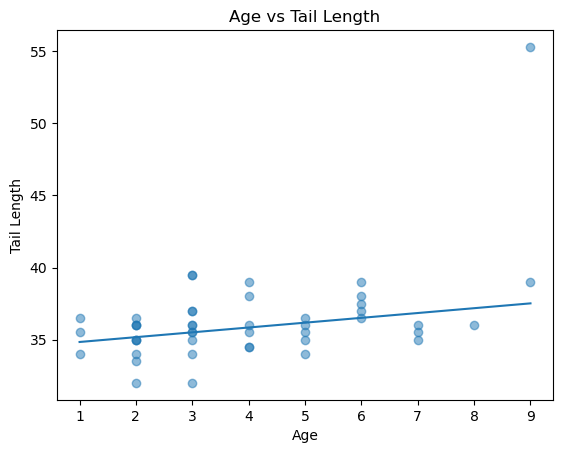

In [140]:
# Graphing the predictions
plt.scatter(x = possum_data['age'], y = possum_data['tailL'], alpha = 0.5)
plt.title("Age vs Tail Length")
plt.xlabel("Age")
plt.ylabel("Tail Length")

# Add the line to the graph
plt.plot(possum_pred_lad_line['X'], possum_pred_lad_line['Y'], label = "Predictions")

**Questions:** What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?\
**Answer:** The R2 value of this model is 0.131, thus, we find that the R2 is lower in the LAD model. This suggests that using the OLS to determine the beta values is more beneficial, and can help us determine more accurate predictions for Y. This is because the OLS is more accurate at predicting the mean tail length at a given age, as observed  at age 6, in which OLS can more acurately predict the mean tail length, while LAD fails to. This may be due to the OLS model penalizing larger deviations more heavily, thus, the outlier affects the model more significantly than it does the LAD model.

### Question 2.3: /15 points

Fit an OLS model to the possum data with the `linear_model` module from the `sklearn` package by using the `LinearRegression` class.  In no more than two sentences, comment on the rsquared values from `sklearn` and the rsquared values from your models. Are they similar?

In [141]:
OLS_model = linear_model.LinearRegression()
OLS_model.fit(possum_X, possum_y)

R2_sklearn = OLS_model.score(possum_X, possum_y)
print("The R2 value is:", R2_sklearn)

The R2 value is: 0.22286587947604108


**Answer:** Here, we find the R2 value from sklearn to be 0.223, which is identical to the R2 value we obtained from the OLS model. Thus, these two models perform similarly well, while the LAD performs the poorest, with an R2 value of roughly 0.131.